In [1]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [4]:
X, y = datasets.fetch_openml('boston', return_X_y=True)
x_data = X["LSTAT"] # 주변 이웃 중 하위 계층의 비율
y_data = y # 집의 가격 (in $1,000s)

/opt/anaconda3/envs/goormthon/lib/python3.9/site-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


#### 2. Build the model

In [5]:
_x_data = tf.reshape(x_data, [len(x_data), 1])

In [6]:
W = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # [ # of x's columns, # of nodes in 1st hidden layer ]
W_out = tf.Variable(tf.random_normal([5, 1], dtype=tf.float64)) # [ # of previous W's columns, # of y's columns ]

In [7]:
hidden = tf.nn.sigmoid(tf.matmul(_x_data, W))
output = tf.matmul(hidden, W_out)

#### 3. Set the criterion

In [8]:
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 535.142708030303
Step 5000 || Loss : 84.44786484428676
Step 10000 || Loss : 84.43751592380058
Step 15000 || Loss : 84.43288592308922
Step 20000 || Loss : 84.4302223766662
Step 25000 || Loss : 84.42847918305151
Step 30000 || Loss : 84.42724416674804
Step 35000 || Loss : 84.42632069736473
Step 40000 || Loss : 84.4256026185008
Step 45000 || Loss : 84.42502739236984


#### 5. Visualize trained model

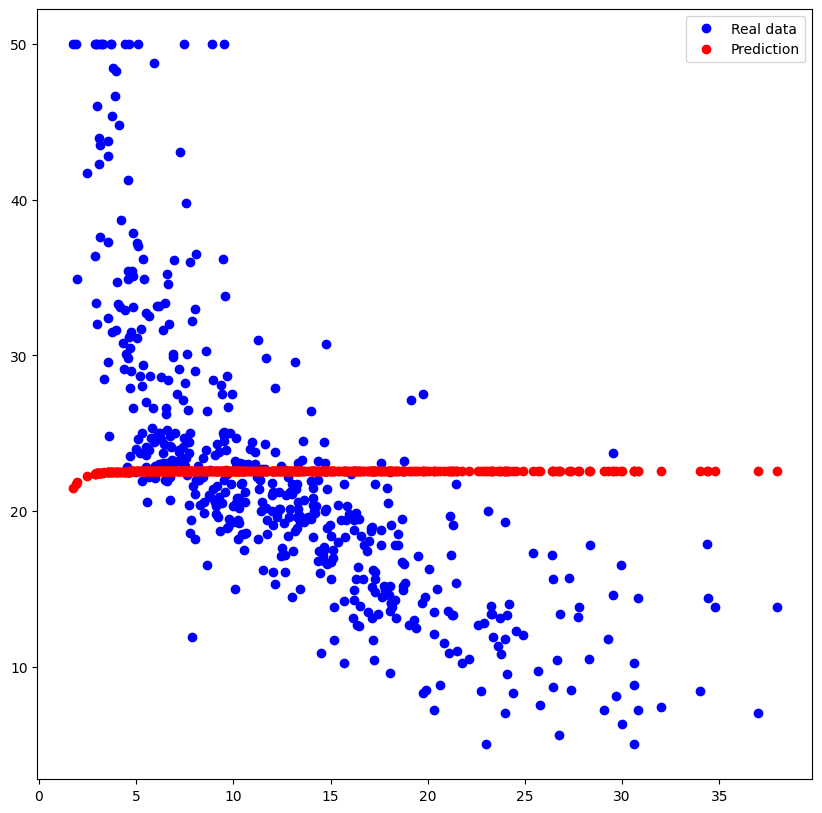

In [10]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()